In [1]:
import pyarrow.parquet as pq
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from dbfread import DBF
import pyarrow.parquet as pq

warnings.filterwarnings("ignore")

path="datasets/"

# Tabla de vehiculos electricos

Este es un grafico de barras que tiene el promedio del rango (distancia maxima antes de que se acabe la bateria) y timepo de recarga(h) por tipo de autos, se puede ver en el grafico que mientras mas grandes son los autos mayor es el tiempo de recarga y el rango, aunque el crecimiento con el rango no es tan significativa como en el tiempo de recarga

In [ ]:
tab2=electricos[["tipo de vehiculo","rango(km)"]].groupby("tipo de vehiculo").agg({"rango(km)":"mean"}).reset_index().sort_values(by="rango(km)",ascending=True)
tab2["tipo de vehiculo"]=tab2["tipo de vehiculo"].apply(lambda x:acomodar(x))
tab=pd.merge(tab1,tab2,on="tipo de vehiculo",how="inner")
tab["rango(km)"]=tab["rango(km)"]/100

In [ ]:
bar_width = 0.35  # Ancho de las barras
index = np.arange(len(tab["tipo de vehiculo"]))  # Índices de las barras

# Crear las barras para tiempo de recarga
plt.bar(index, tab["tiempo de recarga(h)"], bar_width, label='Tiempo de Recarga (h)', color='skyblue')

# Crear las barras para rango de kilómetros
plt.bar(index + bar_width, tab["rango(km)"], bar_width, label='Rango (100 km)', color='orange')

# Añadir etiquetas y título
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Valor')
plt.title('Tiempo de Recarga y Rango de Kilómetros de Vehículos Eléctricos')
plt.xticks(index + bar_width / 2, tab["tipo de vehiculo"])  # Etiquetas de tipo de vehículo

# Añadir leyenda
plt.legend()

plt.xticks(rotation=45)

# Mostrar la gráfica
plt.tight_layout()  # Ajustar diseño
plt.show()

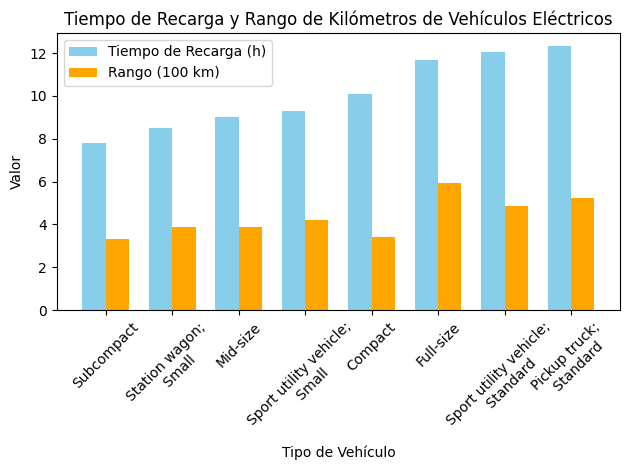

# Tabla de vehiculos convencionales

In [ ]:
convencional=pd.read_csv("vehiculos de combustible convencional.csv",encoding="latin1")
convencional.drop(columns=["Unnamed: 0"],inplace=True)

X = Regular gasoline

Z = Premium gasoline

D = Diesel; E = E85

N = Natural Gas

In [ ]:
plt.figure(figsize=(3, 4))  # Ajusta el tamaño de la figura según tus necesidades
plt.bar(tab['combustible'], tab['Combinado(L/100 km)'], color='green')
#plt.xticks(rotation=45, ha='right')
plt.title('Eficiencia de combustible en ciudad por combustible')
plt.xlabel('Tipo de combustible')
plt.ylabel('Eficiencia (L/100 km)')
plt.show()

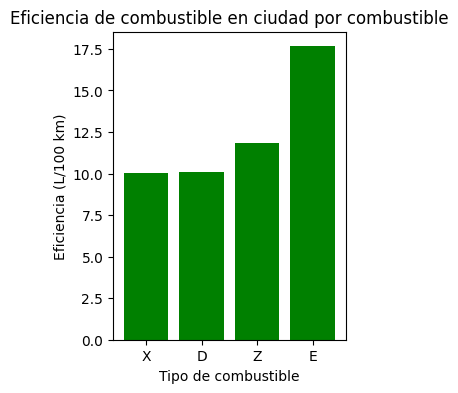

hay que recordar que mientras mas bajo el numero mas eficiente es.

Segun el grafico generalmente la gasolina regular es mas eficiente que la premium, aunque el grafico es producto de el promedio de la eficiencia en el campo de combinado lo que significa que es 55% ciudad y 45% carretera, el etanol es menos eficiente con diferencia y el diesel aunque esta presente en pocos tipo de vehiculos se nota que suele ser mas eficiente que en los demas en el mismo grupo

In [ ]:
plt.figure(figsize=(14, 6))

bar_width = 0.2  # Ancho de las barras
index = np.arange(len(tab["tipo de vehiculo"]))  # Índices de las barras

# Crear las barras agrupadas
for i, columna in enumerate(['X', 'Z', 'E', 'D']):
    plt.bar(index + i * bar_width, tab[columna], bar_width, label=columna)

# Añadir etiquetas y título
plt.xlabel('Tipo de Vehículo')
plt.ylabel('Valor')
plt.title('Valores para cada tipo de vehículo')
plt.xticks(index + bar_width * 1.5, tab["tipo de vehiculo"], rotation=90)  # Etiquetas de tipo de vehículo
plt.legend()

plt.xticks(rotation=45)

# Mostrar la gráfica
plt.tight_layout()
plt.show()

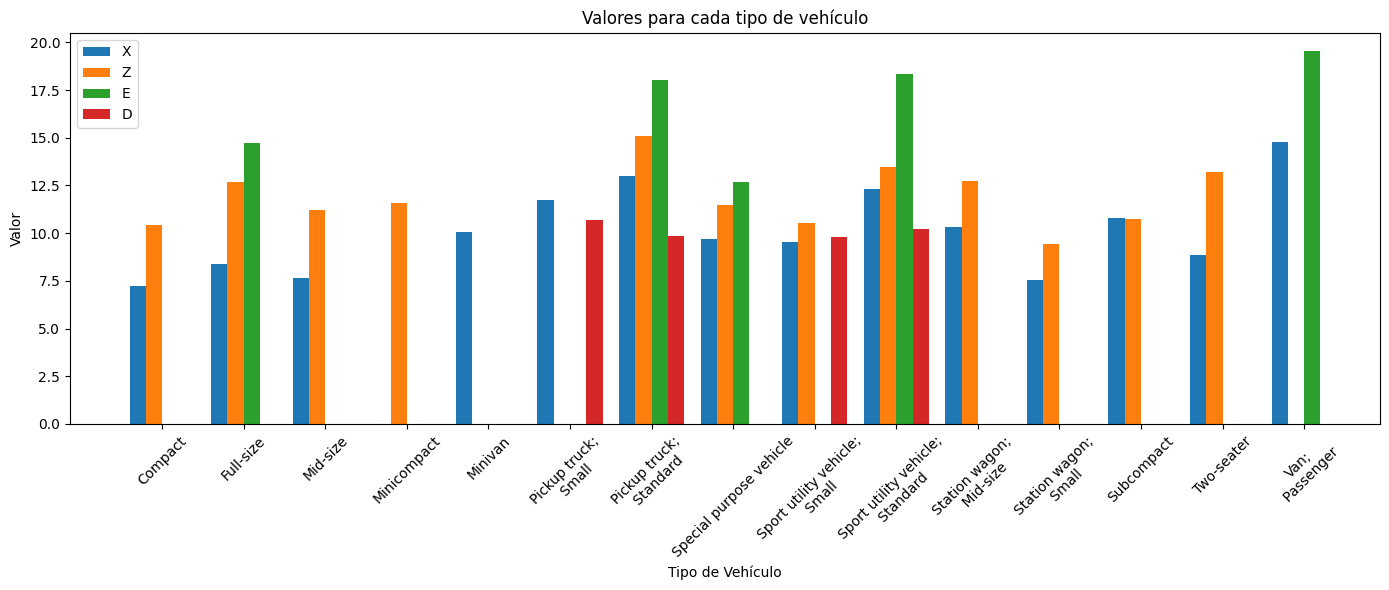

# Tabla de hibridos

el rango 1 es la distancia maxima que puede alcanzar el vehiculo con la bateria totalmente cargada (en modo electrico)

el rango 2 es la distancia maxima que puede alcanzar el vehiculo con el tanque cargado al maximo (usando combustibles convencionales)

In [ ]:
print("minimo  : "+str(hibridos["rango 1"].min()))
print("maximo  : "+str(hibridos["rango 1"].max()))
print("promedio: "+str(hibridos["rango 1"].mean()))

minimo  : 8.0
maximo  : 203.0
promedio: 46.12328767123287


In [ ]:
print("minimo  : "+str(hibridos["rango 2"].min()))
print("maximo  : "+str(hibridos["rango 2"].max()))
print("promedio: "+str(hibridos["rango 2"].mean()))

minimo  : 116.0
maximo  : 995.0
promedio: 654.0308219178082


la diferencia entre combustible 1 y 2 es que en el 1 dice cual es el combustible para el motor electrico, como es un auto hibrido el motor electrico puede funcionar con gasolina o con bateria, y en el 2 por otro lado tiene un motor mecanico que funciona solo con gasolina 

------------------------------------------------------------------------------------------------------------------------------------------------------------

# EDA de infrmacion de taxis , viajes y tarifas

    DATASET TAXIS AMARILLOS

In [2]:

# Especifica la ruta al archivo Parquet
ruta_archivo = 'Datasets/taxis_amarillos.parquet'

# Abre el archivo Parquet
tabla_parquet = pq.read_table(ruta_archivo)

# Convierte la tabla a un DataFrame de pandas
df_taxisAmarillos = tabla_parquet.to_pandas()

# Ahora puedes trabajar con la tabla o el DataFrame según tus necesidades
df_taxisAmarillos.head()

,extra,ProveedorID,hora comienzo de viaje,hora fin de viaje,numero de pasajeros,distancia de viaje,tarifaID,InicioLocalidadID,FinLocalidadID,metodo de pago,...,propina,monto peajes,monto de mejoras,monto total,monto de congestion,monto aeropuerto,fecha,costo de viaje gasolina ($usd),costo de viaje kwh ($usd),duracion de viaje (min)
0,1.00,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1,1.561060,Standard rate,161,141,Sin cargo,...,0.00,0.0,1.0,14.30,2.5,0.143557,2023-01-01 00:32:10,0.13,0.04,8.43
1,1.00,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1,1.770274,Standard rate,43,237,Efectivo,...,4.00,0.0,1.0,16.90,2.5,0.143557,2023-01-01 00:55:08,0.14,0.04,6.32
2,1.00,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1,4.039443,Standard rate,48,238,Efectivo,...,15.00,0.0,1.0,34.90,2.5,0.143557,2023-01-01 00:25:04,0.33,0.10,12.75
3,7.25,1,2023-01-01 00:03:48,2023-01-01 00:13:25,1,3.057746,Standard rate,138,7,Efectivo,...,0.00,0.0,1.0,20.85,0.0,0.143557,2023-01-01 00:03:48,0.25,0.08,9.62
4,1.00,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1,2.301356,Standard rate,107,79,Efectivo,...,3.28,0.0,1.0,19.68,2.5,0.143557,2023-01-01 00:10:29,0.19,0.06,10.83


AGREGAMOS COLUMNA DE COSTO DE VIAJE CONVENCIONAL Y COSTO DE VIAJE ELECTRICO

In [3]:
# https://es.globalpetrolprices.com/USA/gasoline_prices/
# https://miituo.com/blog/cuantos-kilometros-rinde-un-litro-de-gasolina/

precio_gasolina_por_litro = 0.9 # Precio en usd actualizado al 29-01-24
distancia_recorrida_por_litro = 11 # Promedio entre 10 y 12 km por litro
precio_gasolina_por_km = precio_gasolina_por_litro/distancia_recorrida_por_litro  # Ingresa el precio de la gasolina por km

# Crear la nueva columna 'costo de viaje gasolina'
df_taxisAmarillos['costo de viaje gasolina ($usd)'] = (df_taxisAmarillos['distancia de viaje'] * precio_gasolina_por_km).round(2)

In [4]:
df_taxisAmarillos.head()

,extra,ProveedorID,hora comienzo de viaje,hora fin de viaje,numero de pasajeros,distancia de viaje,tarifaID,InicioLocalidadID,FinLocalidadID,metodo de pago,monto de tarifa,impuesto MTA,propina,monto peajes,monto de mejoras,monto total,monto de congestion,monto aeropuerto,fecha,costo de viaje gasolina ($usd)
0,1.00,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,1.561060,1.0,161,141,Sin cargo,9.3,0.5,0.00,0.0,1.0,14.30,2.5,NaN,2023-01-01 00:32:10,0.13
1,1.00,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.770274,1.0,43,237,Efectivo,7.9,0.5,4.00,0.0,1.0,16.90,2.5,NaN,2023-01-01 00:55:08,0.14
2,1.00,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,4.039443,1.0,48,238,Efectivo,14.9,0.5,15.00,0.0,1.0,34.90,2.5,NaN,2023-01-01 00:25:04,0.33
3,7.25,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,3.057746,1.0,138,7,Efectivo,12.1,0.5,0.00,0.0,1.0,20.85,0.0,NaN,2023-01-01 00:03:48,0.25
4,1.00,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,2.301356,1.0,107,79,Efectivo,11.4,0.5,3.28,0.0,1.0,19.68,2.5,NaN,2023-01-01 00:10:29,0.19


In [5]:
# https://siempreauto.com/cuanto-consume-un-carro-electrico/
# https://www.carwow.es/coches-electricos/calculadora-autonomia

precio_carga_por_kwh = 0.175 # El costo por kWh en Estados Unidos es de $0.175 dólares, aproximadamente . Actualizado al 21-01-24
distancia_recorrida_por_kwh = 7 # Promedio entre 6 y 8 km por kwh
precio_kwh_por_km = precio_carga_por_kwh/distancia_recorrida_por_kwh  # Ingresa el precio de la gasolina por km

# Crear la nueva columna 'costo de viaje kwh'
df_taxisAmarillos['costo de viaje kwh ($usd)'] = (df_taxisAmarillos['distancia de viaje'] * precio_kwh_por_km).round(2)

In [6]:
df_taxisAmarillos.head()

,extra,ProveedorID,hora comienzo de viaje,hora fin de viaje,numero de pasajeros,distancia de viaje,tarifaID,InicioLocalidadID,FinLocalidadID,metodo de pago,...,impuesto MTA,propina,monto peajes,monto de mejoras,monto total,monto de congestion,monto aeropuerto,fecha,costo de viaje gasolina ($usd),costo de viaje kwh ($usd)
0,1.00,2,2023-01-01 00:32:10,2023-01-01 00:40:36,1.0,1.561060,1.0,161,141,Sin cargo,...,0.5,0.00,0.0,1.0,14.30,2.5,NaN,2023-01-01 00:32:10,0.13,0.04
1,1.00,2,2023-01-01 00:55:08,2023-01-01 01:01:27,1.0,1.770274,1.0,43,237,Efectivo,...,0.5,4.00,0.0,1.0,16.90,2.5,NaN,2023-01-01 00:55:08,0.14,0.04
2,1.00,2,2023-01-01 00:25:04,2023-01-01 00:37:49,1.0,4.039443,1.0,48,238,Efectivo,...,0.5,15.00,0.0,1.0,34.90,2.5,NaN,2023-01-01 00:25:04,0.33,0.10
3,7.25,1,2023-01-01 00:03:48,2023-01-01 00:13:25,0.0,3.057746,1.0,138,7,Efectivo,...,0.5,0.00,0.0,1.0,20.85,0.0,NaN,2023-01-01 00:03:48,0.25,0.08
4,1.00,2,2023-01-01 00:10:29,2023-01-01 00:21:19,1.0,2.301356,1.0,107,79,Efectivo,...,0.5,3.28,0.0,1.0,19.68,2.5,NaN,2023-01-01 00:10:29,0.19,0.06


In [7]:
df_taxisAmarillos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34933659 entries, 0 to 34933658
Data columns (total 21 columns):
 #   Column                          Dtype         
---  ------                          -----         
 0   extra                           float64       
 1   ProveedorID                     int64         
 2   hora comienzo de viaje          datetime64[us]
 3   hora fin de viaje               datetime64[us]
 4   numero de pasajeros             float64       
 5   distancia de viaje              float64       
 6   tarifaID                        float64       
 7   InicioLocalidadID               int64         
 8   FinLocalidadID                  int64         
 9   metodo de pago                  object        
 10  monto de tarifa                 float64       
 11  impuesto MTA                    float64       
 12  propina                         float64       
 13  monto peajes                    float64       
 14  monto de mejoras                float64       
 

In [43]:
# Buscar duplicados
df_taxisAmarillos.duplicated().sum() 

2

In [8]:
# Verificar si hay valores faltantes en todo el DataFrame

df_taxisAmarillos.isna().sum()

extra                                   0
ProveedorID                             0
hora comienzo de viaje                  0
hora fin de viaje                       0
numero de pasajeros               1129353
distancia de viaje                      0
tarifaID                          1319581
InicioLocalidadID                       0
FinLocalidadID                          0
metodo de pago                          0
monto de tarifa                         0
impuesto MTA                            0
propina                                 0
monto peajes                            0
monto de mejoras                        0
monto total                             0
monto de congestion               1129353
monto aeropuerto                  4124376
fecha                                   0
costo de viaje gasolina ($usd)          0
costo de viaje kwh ($usd)               0
dtype: int64

In [9]:
# Llenar valores nulos con un valor específico antes de la conversión
df_taxisAmarillos['numero de pasajeros'] = df_taxisAmarillos['numero de pasajeros'].fillna(1).astype(int)


In [10]:
# Reemplazar valores '0' por '1'
df_taxisAmarillos['numero de pasajeros'] = df_taxisAmarillos['numero de pasajeros'].replace(0, 1)

In [2]:
# Especifica la ruta al archivo Parquet
ruta_archivo = 'Datasets/taxis_amarillos.parquet'

# Abre el archivo Parquet
tabla_parquet = pq.read_table(ruta_archivo)

# Convierte la tabla a un DataFrame de pandas
df_taxisAmarillos = tabla_parquet.to_pandas()

In [11]:
# Especificar las columnas que quieres llenar con la media
columnas_a_llenar = ['monto de congestion', 'monto aeropuerto']

# Llenar valores faltantes solo en las columnas especificadas con la media de cada columna
df_taxisAmarillos[columnas_a_llenar] = df_taxisAmarillos[columnas_a_llenar].fillna(df_taxisAmarillos[columnas_a_llenar].mean())

In [12]:
df_taxisAmarillos.isna().sum()

extra                                   0
ProveedorID                             0
hora comienzo de viaje                  0
hora fin de viaje                       0
numero de pasajeros                     0
distancia de viaje                      0
tarifaID                          1319581
InicioLocalidadID                       0
FinLocalidadID                          0
metodo de pago                          0
monto de tarifa                         0
impuesto MTA                            0
propina                                 0
monto peajes                            0
monto de mejoras                        0
monto total                             0
monto de congestion                     0
monto aeropuerto                        0
fecha                                   0
costo de viaje gasolina ($usd)          0
costo de viaje kwh ($usd)               0
dtype: int64

In [16]:
# Detección de outliers en todas las columnas

# Especificar manualmente las columnas que quieres analizar
columnas_interes = ['extra', 'numero de pasajeros', 'distancia de viaje', 'monto de tarifa', 'monto total']

# Calcular el rango intercuartílico (IQR) para las columnas seleccionadas
Q1 = df_taxisAmarillos[columnas_interes].quantile(0.25)
Q3 = df_taxisAmarillos[columnas_interes].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers en las columnas seleccionadas
outliers = ((df_taxisAmarillos[columnas_interes] < limite_inferior) | (df_taxisAmarillos[columnas_interes] > limite_superior))

# Filtrar el DataFrame para mostrar solo las filas con al menos un True en las columnas de interés
filas_con_outliers_interes = df_taxisAmarillos.loc[outliers.any(axis=1), columnas_interes]

# Mostrar las filas con outliers y solo las columnas de interés
print("Filas con outliers en columnas de interés:")
print(filas_con_outliers_interes)


Filas con outliers en columnas de interés:
          extra  numero de pasajeros  distancia de viaje  monto de tarifa  \
3          7.25                    1            3.057746            12.10   
7          1.00                    1           18.829278            45.70   
11         3.50                    4           11.748182            33.80   
13         6.00                    2           18.394756            44.30   
18         3.50                    3            1.931208             8.60   
...         ...                  ...                 ...              ...   
31645361   0.00                    1           15.240450            40.40   
31645386   0.00                    1           12.327544            36.02   
31645391   0.00                    1           12.649412            31.27   
31645397   7.75                    1           18.346476            47.10   
31645398   0.00                    1           15.047329            40.02   

          monto total  
3       

In [13]:
# Mostrar los n valores más altos de una columna
n = 5  # Ajustar el valor de n según necesidades
valores_mas_altos = df_taxisAmarillos['extra'].nlargest(n)
print(valores_mas_altos)


26249203    10002.50
10090396       96.38
20210778       67.33
31775682       65.00
5945005        20.80
Name: extra, dtype: float64


In [14]:
n = 5  # Ajustar el valor de n según necesidades
valores_mas_altos = df_taxisAmarillos['numero de pasajeros'].nlargest(n)
print(valores_mas_altos)

1588800    9
3197206    9
3465269    9
3865876    9
4981332    9
Name: numero de pasajeros, dtype: int32


In [15]:
# Filtrar valores mayores a 4 en la columna 'numero de pasajeros'
valores_mayores_a_4 = df_taxisAmarillos[df_taxisAmarillos['numero de pasajeros'] > 4]

# Obtener la cantidad de valores mayores a 4
cantidad_valores_mayores_a_4 = len(valores_mayores_a_4)

# Mostrar la cantidad de valores mayores a 4
print(f"Cantidad de pasajeros mayores a 4: {cantidad_valores_mayores_a_4}")

Cantidad de pasajeros mayores a 4: 736910


In [16]:
n = 5  # Ajustar el valor de n según necesidades
valores_mas_altos = df_taxisAmarillos['distancia de viaje'].nlargest(n)
print(valores_mas_altos)

25178451    556396.216970
16115613    550949.260899
5959075     539135.868442
12672047    477783.144463
28053740    427874.324570
Name: distancia de viaje, dtype: float64


In [17]:
# Filtrar valores mayores a 500 en la columna 'distancia de viaje'
valores_mayores_a_500 = df_taxisAmarillos[df_taxisAmarillos['distancia de viaje'] > 500]

# Obtener la cantidad de valores mayores a 500
cantidad_valores_mayores_a_500 = len(valores_mayores_a_500)

# Mostrar la cantidad de valores mayores a 500
print(f"Cantidad de valores mayores a 500 km en 'distancia de viaje': {cantidad_valores_mayores_a_500}")

Cantidad de valores mayores a 500 km en 'distancia de viaje': 907


In [18]:
# Eliminar las filas que tienen valores mayores a 500 en la columna 'distancia de viaje' porque los considero errores
df_taxisAmarillos = df_taxisAmarillos[df_taxisAmarillos['distancia de viaje'] <= 500]


In [19]:
n = 5  # Ajustar el valor de n según necesidades
valores_mas_altos = df_taxisAmarillos['monto de tarifa'].nlargest(n)
print(valores_mas_altos)

17439335    386983.63
25349953    187502.96
25555738    143163.45
26249203     19152.90
27892250     12015.47
Name: monto de tarifa, dtype: float64


In [20]:
n = 5  # Ajustar el valor de n según necesidades
valores_mas_altos = df_taxisAmarillos['monto total'].nlargest(n)
print(valores_mas_altos)

17439335    386987.63
25349953    187513.90
25555738    143167.45
26249203     29156.90
27892250     12015.47
Name: monto total, dtype: float64


In [21]:
df_taxisAmarillos.isna().sum()

extra                                   0
ProveedorID                             0
hora comienzo de viaje                  0
hora fin de viaje                       0
numero de pasajeros                     0
distancia de viaje                      0
tarifaID                          1318982
InicioLocalidadID                       0
FinLocalidadID                          0
metodo de pago                          0
monto de tarifa                         0
impuesto MTA                            0
propina                                 0
monto peajes                            0
monto de mejoras                        0
monto total                             0
monto de congestion                     0
monto aeropuerto                        0
fecha                                   0
costo de viaje gasolina ($usd)          0
costo de viaje kwh ($usd)               0
dtype: int64

In [22]:
# Reemplazar los valores faltantes en la columna 'tarifaID' por '1.0'
df_taxisAmarillos['tarifaID'] = df_taxisAmarillos['tarifaID'].fillna(1.0)

df_taxisAmarillos.isna().sum()

extra                             0
ProveedorID                       0
hora comienzo de viaje            0
hora fin de viaje                 0
numero de pasajeros               0
distancia de viaje                0
tarifaID                          0
InicioLocalidadID                 0
FinLocalidadID                    0
metodo de pago                    0
monto de tarifa                   0
impuesto MTA                      0
propina                           0
monto peajes                      0
monto de mejoras                  0
monto total                       0
monto de congestion               0
monto aeropuerto                  0
fecha                             0
costo de viaje gasolina ($usd)    0
costo de viaje kwh ($usd)         0
dtype: int64

In [33]:
# Filtrar el DataFrame para mantener solo las filas con fechas dentro del rango especificado
df_taxisAmarillos = df_taxisAmarillos[(df_taxisAmarillos['hora comienzo de viaje'] >= '2023-01-01') & (df_taxisAmarillos['hora comienzo de viaje'] < '2023-12-01')]

In [24]:
# Calcula la media de cada columna
columnas = ['distancia de viaje', 'monto total', 'monto de congestion','numero de pasajeros', 'monto de tarifa', 'propina','monto peajes', 'monto de mejoras', 'monto aeropuerto', 'costo de viaje gasolina ($usd)', 'costo de viaje kwh ($usd)']
medias = df_taxisAmarillos[columnas].mean()

# Reemplaza los valores negativos por la media
for columna in columnas:
    df_taxisAmarillos[columna] = df_taxisAmarillos[columna].apply(lambda x: medias[columna] if x < 0 else x)

In [25]:
# Mapeo de valores a palabras
mapeo_tarifas = {
    1.0: 'Standard rate',
    2.0: 'JFK',
    3.0: 'Newark',
    4.0: 'Nassau or Westchester',
    5.0: 'Negotiated fare',
    6.0: 'Group ride'
}

# Aplicar el mapeo a la columna 'tarifaID'
df_taxisAmarillos['tarifaID'] = df_taxisAmarillos['tarifaID'].map(mapeo_tarifas)

In [26]:
# Calcular y agregar columna de la duración de viaje en minutos
df_taxisAmarillos['duracion de viaje (min)'] = ((df_taxisAmarillos['hora fin de viaje'] - df_taxisAmarillos['hora comienzo de viaje']).dt.total_seconds() / 60).round(2)

Duración promedio de los viajes (minutos): 15.67816959856371
Distancia promedio de los viajes: 5.241592425512006


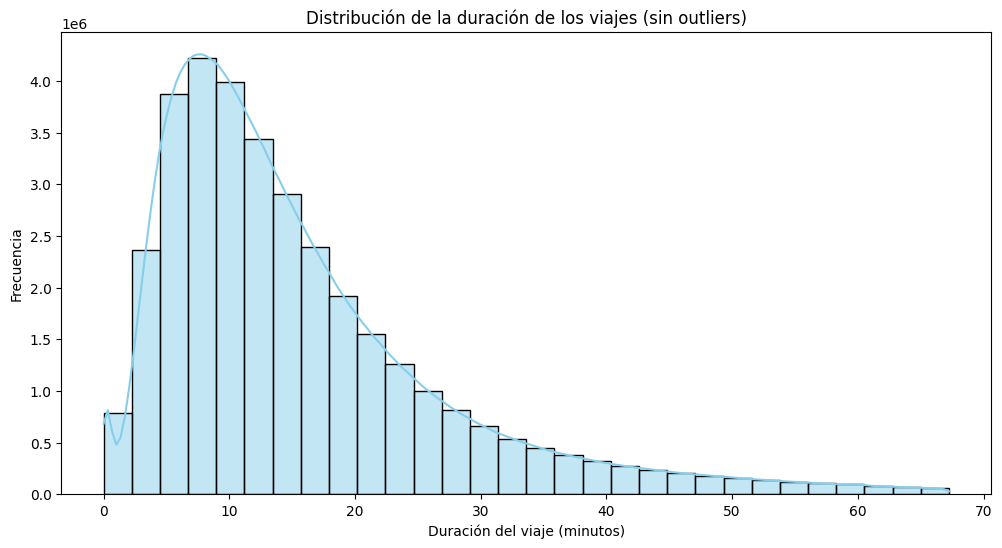

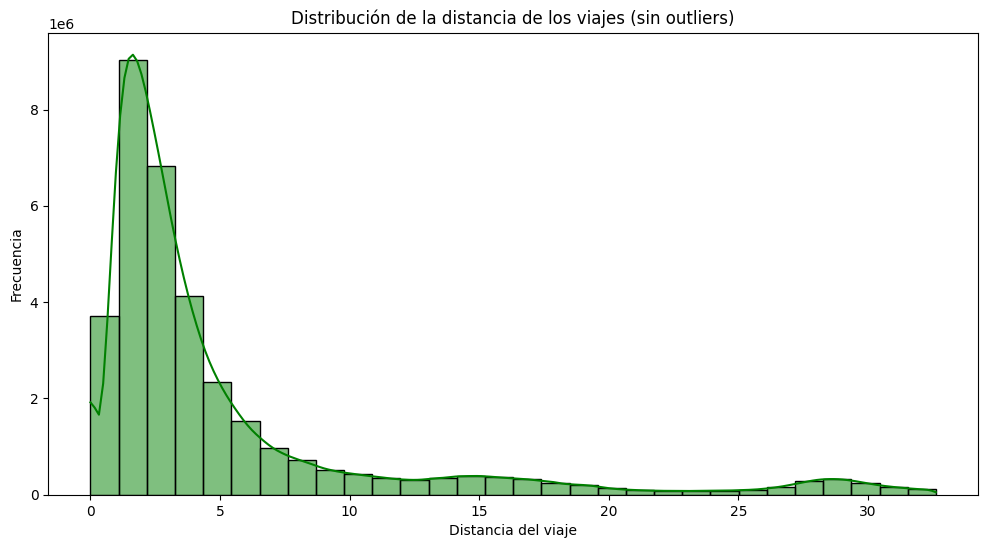

In [3]:
# Eliminar outliers para la distancia de los viajes (incluyendo valores negativos)
distancia_sin_outliers = df_taxisAmarillos[(df_taxisAmarillos['distancia de viaje'] >= 0) & (df_taxisAmarillos['distancia de viaje'] < df_taxisAmarillos['distancia de viaje'].quantile(0.99))]

# Eliminar outliers para la duración de los viajes (incluyendo valores negativos)
duracion_sin_outliers = df_taxisAmarillos[(df_taxisAmarillos['duracion de viaje (min)'] >= 0) & (df_taxisAmarillos['duracion de viaje (min)'] < df_taxisAmarillos['duracion de viaje (min)'].quantile(0.99))]

# Analizar la duración promedio de los viajes
duracion_promedio = duracion_sin_outliers['duracion de viaje (min)'].mean()
print("Duración promedio de los viajes (minutos):", duracion_promedio)

# Analizar la distancia promedio de los viajes
distancia_promedio = distancia_sin_outliers['distancia de viaje'].mean()
print("Distancia promedio de los viajes:", distancia_promedio)

# Visualizar la distribución de la duración de los viajes sin outliers
plt.figure(figsize=(12, 6))
sns.histplot(duracion_sin_outliers['duracion de viaje (min)'], kde=True, color='skyblue', bins=30)
plt.xlabel('Duración del viaje (minutos)')
plt.ylabel('Frecuencia')
plt.title('Distribución de la duración de los viajes (sin outliers)')
plt.show()


# Visualizar la distribución de la distancia de los viajes sin outliers
plt.figure(figsize=(12, 6))
sns.histplot(distancia_sin_outliers['distancia de viaje'], kde=True, color='green', bins=30)
plt.xlabel('Distancia del viaje')
plt.ylabel('Frecuencia')
plt.title('Distribución de la distancia de los viajes (sin outliers)')
plt.show()


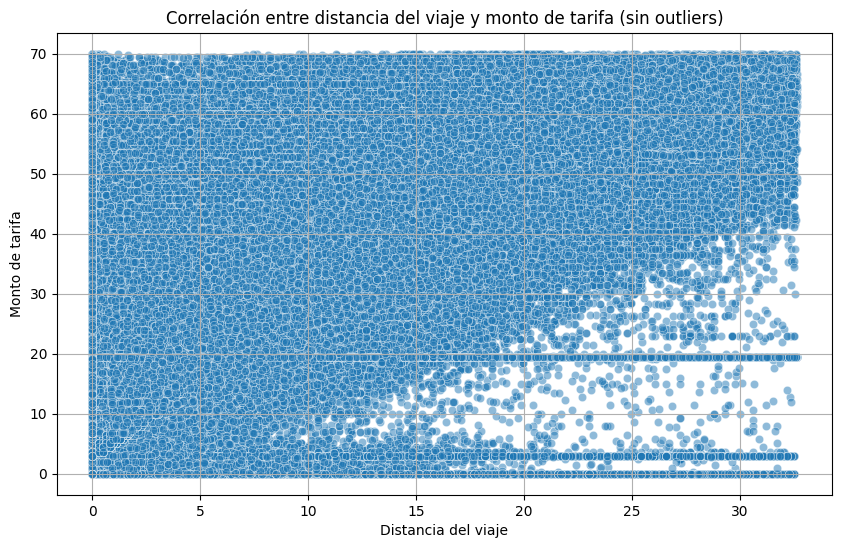

In [3]:
# Filtrar outliers y valores negativos
df_filtered = df_taxisAmarillos[(df_taxisAmarillos['distancia de viaje'] >= 0) & (df_taxisAmarillos['distancia de viaje'] < df_taxisAmarillos['distancia de viaje'].quantile(0.99))]
df_filtered = df_filtered[(df_filtered['monto de tarifa'] >= 0) & (df_filtered['monto de tarifa'] < df_filtered['monto de tarifa'].quantile(0.99))]

# Crear el diagrama de dispersión sin outliers ni valores negativos
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='distancia de viaje', y='monto de tarifa', alpha=0.5)
plt.xlabel('Distancia del viaje')
plt.ylabel('Monto de tarifa')
plt.title('Correlación entre distancia del viaje y monto de tarifa (sin outliers)')
plt.grid(True)
plt.show()

In [4]:
correlation = df_filtered['distancia de viaje'].corr(df_filtered['monto de tarifa'])
print("Coeficiente de correlación:", correlation)

Coeficiente de correlación: 0.9126392788981409


Tarifas fijas o tarifas mínimas: Algunos servicios de taxi pueden tener tarifas mínimas o tarifas fijas para ciertos viajes cortos. Esto significa que incluso para distancias cortas, el monto de la tarifa puede ser relativamente alto debido a estas tarifas mínimas.

Recargos adicionales: Además de la distancia del viaje, los servicios de taxi pueden aplicar recargos adicionales por diferentes motivos, como horarios nocturnos, peajes, recogidas en aeropuertos u otros lugares especiales. Estos recargos adicionales pueden hacer que el monto de la tarifa sea más alto para viajes cortos.

Condiciones del tráfico: En áreas urbanas congestionadas, los viajes cortos pueden tomar más tiempo debido al tráfico intenso, lo que podría resultar en un monto de tarifa más alto debido al tiempo adicional necesario para completar el viaje.

Demanda y oferta: Durante períodos de alta demanda o en áreas con poca disponibilidad de taxis, es posible que los precios aumenten, lo que podría explicar tarifas más altas para viajes cortos.

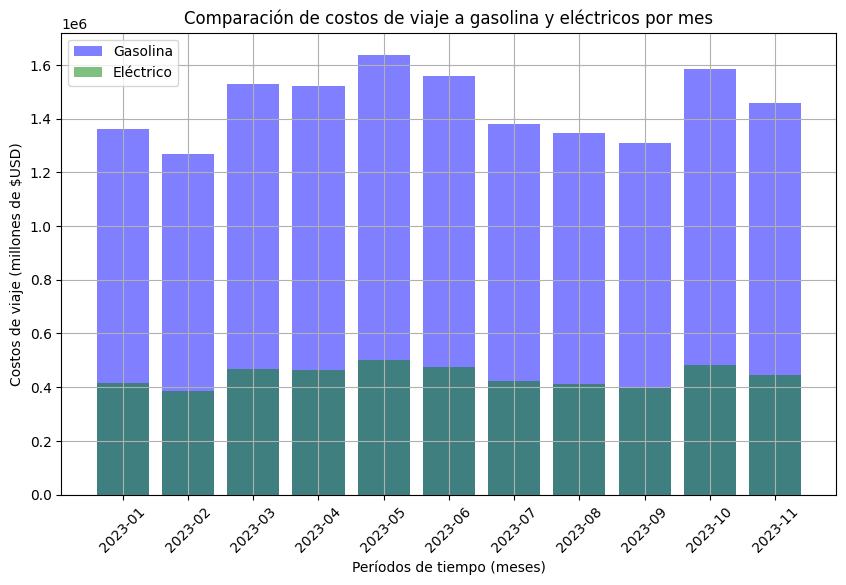

In [5]:
# Agrupar por mes y calcular el costo promedio de viaje para cada mes para ambos tipos de vehículos
costos_gasolina_por_mes = df_taxisAmarillos.groupby(df_taxisAmarillos['hora comienzo de viaje'].dt.to_period('M'))['costo de viaje gasolina ($usd)'].sum()
costos_electrico_por_mes = df_taxisAmarillos.groupby(df_taxisAmarillos['hora comienzo de viaje'].dt.to_period('M'))['costo de viaje kwh ($usd)'].sum()

# Obtener los períodos de tiempo (meses)
periodos = [str(periodo) for periodo in costos_gasolina_por_mes.index]

# Crear el gráfico de barras comparativo
plt.figure(figsize=(10, 6))
plt.bar(periodos, costos_gasolina_por_mes, label='Gasolina', color='blue', alpha=0.5)
plt.bar(periodos, costos_electrico_por_mes, label='Eléctrico', color='green', alpha=0.5)
plt.xlabel('Períodos de tiempo (meses)')
plt.ylabel('Costos de viaje (millones de $USD)')
plt.title('Comparación de costos de viaje a gasolina y eléctricos por mes')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [6]:
# Total costo de viajes a gasolina
total_costo_gasolina = df_taxisAmarillos['costo de viaje gasolina ($usd)'].sum()

# Total costo de viajes a batería
total_costo_bateria = df_taxisAmarillos['costo de viaje kwh ($usd)'].sum()

# Calcular el porcentaje de ahorro
porcentaje_ahorro = ((total_costo_gasolina - total_costo_bateria) / total_costo_gasolina) * 100

print("Total del costo de viajes a gasolina anualizado es: $", round(total_costo_gasolina, 2))
print("Total del costo de viajes a batería anualizado es: $", round(total_costo_bateria, 2))
print("El porcentaje de ahorro al cambiar a autos eléctricos sería del:", round(porcentaje_ahorro, 2), "%")


Total del costo de viajes a gasolina anualizado es: $ 15957115.8
Total del costo de viajes a batería anualizado es: $ 4873741.03
El porcentaje de ahorro al cambiar a autos eléctricos sería del: 69.46 %


Para calcular la eficiencia de combustible eléctrico y a gasolina, multiplicamos la distancia recorrida de cada viaje por el precio del combustible necesario para cubrir un kilómetro. En el caso de los vehículos eléctricos, multiplicamos la distancia del viaje por el costo por kilovatio-hora (kWh) de electricidad. Para los vehículos de gasolina, multiplicamos la distancia del viaje por el precio por litro de gasolina y luego convertimos este valor a dólares por kilómetro utilizando la eficiencia en kilometros por litro del vehículo. Este enfoque nos permite comparar directamente los costos de combustible de ambos tipos de vehículos en términos de dólares kilómetro, lo que nos brinda información sobre su eficiencia relativa en el uso de la energía.

Eficiencia de combustible: Los vehículos eléctricos tienden a ser más eficientes en el uso de la energía en comparación con los vehículos de gasolina. Esto significa que pueden recorrer más distancia por unidad de energía consumida, lo que resulta en costos de combustible más bajos en términos de dólares por milla o kilómetro.

In [34]:
# Guardar el DataFrame en formato Parquet
df_taxisAmarillos.to_parquet('Datasets/taxis_amarillos.parquet', index=False)


        DATASET TAXIS VERDES

In [30]:
# Especifica la ruta al archivo Parquet
ruta_archivo = 'Datasets/taxis_verdes.parquet'

# Abre el archivo Parquet
tabla_parquet = pq.read_table(ruta_archivo)

# Convierte la tabla a un DataFrame de pandas
df_taxisVerdes = tabla_parquet.to_pandas()

AGREGAMOS COLUMNA DE COSTO DE VIAJE CONVENCIONAL Y COSTO DE VIAJE ELECTRICO

In [29]:
# https://es.globalpetrolprices.com/USA/gasoline_prices/
# https://miituo.com/blog/cuantos-kilometros-rinde-un-litro-de-gasolina/

precio_gasolina_por_litro = 0.9 # Precio en usd actualizado al 29-01-24
distancia_recorrida_por_litro = 11 # Promedio entre 10 y 12 km por litro
precio_gasolina_por_km = precio_gasolina_por_litro/distancia_recorrida_por_litro  # Ingresa el precio de la gasolina por km

# Crear la nueva columna 'costo de viaje gasolina'
df_taxisVerdes['costo de viaje gasolina ($usd)'] = (df_taxisVerdes['distancia de viaje'] * precio_gasolina_por_km).round(2)

In [30]:
# https://siempreauto.com/cuanto-consume-un-carro-electrico/
# https://www.carwow.es/coches-electricos/calculadora-autonomia

precio_carga_por_kwh = 0.175 # El costo por kWh en Estados Unidos es de $0.175 dólares, aproximadamente . Actualizado al 21-01-24
distancia_recorrida_por_kwh = 7 # Promedio entre 6 y 8 km por kwh
precio_kwh_por_km = precio_carga_por_kwh/distancia_recorrida_por_kwh  # Ingresa el precio de la gasolina por km

# Crear la nueva columna 'costo de viaje kwh'
df_taxisVerdes['costo de viaje kwh ($usd)'] = (df_taxisVerdes['distancia de viaje'] * precio_kwh_por_km).round(2)

In [27]:
df_taxisVerdes.head()

,extra,ProveedorID,hora comienzo de viaje,hora fin de viaje,numero de pasajeros,distancia de viaje,tarifaID,InicioLocalidadID,FinLocalidadID,metodo de pago,monto de tarifa,impuesto MTA,propina,monto peajes,monto de mejoras,monto total,monto de congestion,tipo de viaje,costo de viaje gasolina ($usd),costo de viaje kwh ($usd)
0,1.0,2,2023-01-01 00:26:10,2023-01-01 00:37:11,1.0,4.152097,1.0,166,143,1.0,14.9,0.5,4.03,0.0,1.0,24.18,2.75,1.0,0.34,0.10
1,1.0,2,2023-01-01 00:51:03,2023-01-01 00:57:49,1.0,2.912905,1.0,24,43,1.0,10.7,0.5,2.64,0.0,1.0,15.84,0.00,1.0,0.24,0.07
2,1.0,2,2023-01-01 00:35:12,2023-01-01 00:41:32,1.0,0.000000,1.0,223,179,1.0,7.2,0.5,1.94,0.0,1.0,11.64,0.00,1.0,0.00,0.00
3,0.5,1,2023-01-01 00:13:14,2023-01-01 00:19:03,1.0,2.092142,1.0,41,238,1.0,6.5,1.5,1.70,0.0,1.0,10.20,0.00,1.0,0.17,0.05
4,0.5,1,2023-01-01 00:33:04,2023-01-01 00:39:02,1.0,1.770274,1.0,41,74,1.0,6.0,1.5,0.00,0.0,1.0,8.00,0.00,1.0,0.14,0.04


In [28]:
df_taxisVerdes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722845 entries, 0 to 722844
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   extra                           722845 non-null  float64       
 1   ProveedorID                     722845 non-null  int64         
 2   hora comienzo de viaje          722845 non-null  datetime64[us]
 3   hora fin de viaje               722845 non-null  datetime64[us]
 4   numero de pasajeros             672144 non-null  float64       
 5   distancia de viaje              722845 non-null  float64       
 6   tarifaID                        672101 non-null  float64       
 7   InicioLocalidadID               722845 non-null  int64         
 8   FinLocalidadID                  722845 non-null  int64         
 9   metodo de pago                  672144 non-null  float64       
 10  monto de tarifa                 722845 non-null  float64

In [30]:
# Llenar valores no nulos con un valor específico antes de la conversión a int
df_taxisVerdes['numero de pasajeros'] = df_taxisVerdes['numero de pasajeros'].fillna(1).astype(int)

In [31]:
# Reemplazar valores '0' por '1'
df_taxisVerdes['numero de pasajeros'] = df_taxisVerdes['numero de pasajeros'].replace(0, 1)

In [32]:
# Verificar si hay valores faltantes en todo el DataFrame
df_taxisVerdes.isna().sum()

extra                                 0
ProveedorID                           0
hora comienzo de viaje                0
hora fin de viaje                     0
numero de pasajeros                   0
distancia de viaje                    0
tarifaID                          50744
InicioLocalidadID                     0
FinLocalidadID                        0
metodo de pago                    50701
monto de tarifa                       0
impuesto MTA                          0
propina                               0
monto peajes                          0
monto de mejoras                      0
monto total                           0
monto de congestion               50701
tipo de viaje                     50744
costo de viaje gasolina ($usd)        0
costo de viaje kwh ($usd)             0
dtype: int64

In [33]:
# Eliminar filas con valores faltantes
df_taxisVerdes = df_taxisVerdes.dropna()

In [34]:
df_taxisVerdes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 672101 entries, 0 to 718134
Data columns (total 20 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   extra                           672101 non-null  float64       
 1   ProveedorID                     672101 non-null  int64         
 2   hora comienzo de viaje          672101 non-null  datetime64[us]
 3   hora fin de viaje               672101 non-null  datetime64[us]
 4   numero de pasajeros             672101 non-null  int32         
 5   distancia de viaje              672101 non-null  float64       
 6   tarifaID                        672101 non-null  float64       
 7   InicioLocalidadID               672101 non-null  int64         
 8   FinLocalidadID                  672101 non-null  int64         
 9   metodo de pago                  672101 non-null  float64       
 10  monto de tarifa                 672101 non-null  float64     

In [35]:
# Detección de outliers en todas las columnas

# Especificar manualmente las columnas que quieres analizar
columnas_interes = ['extra', 'numero de pasajeros', 'distancia de viaje', 'monto de tarifa', 'monto total']

# Calcular el rango intercuartílico (IQR) para las columnas seleccionadas
Q1 = df_taxisVerdes[columnas_interes].quantile(0.25)
Q3 = df_taxisVerdes[columnas_interes].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para identificar outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Identificar outliers en las columnas seleccionadas
outliers = ((df_taxisVerdes[columnas_interes] < limite_inferior) | (df_taxisVerdes[columnas_interes] > limite_superior))

# Filtrar el DataFrame para mostrar solo las filas con al menos un True en las columnas de interés
filas_con_outliers_interes = df_taxisVerdes.loc[outliers.any(axis=1), columnas_interes]

# Mostrar las filas con outliers y solo las columnas de interés
print("Filas con outliers en columnas de interés:")
print(filas_con_outliers_interes)

Filas con outliers en columnas de interés:
        extra  numero de pasajeros  distancia de viaje  monto de tarifa  \
6        3.75                    2            6.115492             19.1   
8        1.00                    2            1.786367              7.2   
10       3.75                    2            7.724832             26.8   
12       1.00                    1           11.394127             30.3   
15       0.50                    1           18.185542             32.5   
...       ...                  ...                 ...              ...   
718118   0.00                    5            0.000000              9.0   
718121   1.00                    5            4.361311             14.2   
718122   1.00                    1           12.150517             33.8   
718129   1.00                    1           11.345847             31.7   
718131   1.00                    2            5.149888             17.7   

        monto total  
6             29.20  
8           

In [36]:
# Mostrar los n valores más altos de una columna
n = 5  # Ajustar el valor de n según necesidades
valores_mas_altos = df_taxisVerdes['extra'].nlargest(n)
print(valores_mas_altos)

16801     12.5
167983    12.5
325391    12.5
360326    10.0
710222    10.0
Name: extra, dtype: float64


In [37]:
n = 5  # Ajustar el valor de n según necesidades
valores_mas_altos = df_taxisVerdes['numero de pasajeros'].nlargest(n)
print(valores_mas_altos)

11478     9
44307     9
74296     9
146985    9
160985    9
Name: numero de pasajeros, dtype: int32


In [42]:
# Filtrar valores mayores a 4 en la columna 'numero de pasajeros'
valores_mayores_a_4 = df_taxisVerdes[df_taxisVerdes['numero de pasajeros'] > 4]

# Obtener la cantidad de valores mayores a 4
cantidad_valores_mayores_a_4 = len(valores_mayores_a_4)

# Mostrar la cantidad de valores mayores a 4
print(f"Cantidad de pasajeros mayores a 4: {cantidad_valores_mayores_a_4}")


Cantidad de pasajeros mayores a 4: 26754


In [38]:
n = 5  # Ajustar el valor de n según necesidades
valores_mas_altos = df_taxisVerdes['distancia de viaje'].nlargest(n)
print(valores_mas_altos)

627936    46915.286559
537662    31872.093563
507090    27532.363412
288696    26007.095334
385155    19488.737252
Name: distancia de viaje, dtype: float64


In [44]:
# Filtrar valores mayores a 500 en la columna 'distancia de viaje'
valores_mayores_a_500 = df_taxisVerdes[df_taxisVerdes['distancia de viaje'] > 500]

# Obtener la cantidad de valores mayores a 500
cantidad_valores_mayores_a_500 = len(valores_mayores_a_500)

# Mostrar la cantidad de valores mayores a 500
print(f"Cantidad de valores mayores a 500 km en 'distancia de viaje': {cantidad_valores_mayores_a_500}")


Cantidad de valores mayores a 500 km en 'distancia de viaje': 10


In [35]:
# Eliminar las filas que tienen valores mayores a 500 en la columna 'distancia de viaje' porque los considero errores
df_taxisVerdes = df_taxisVerdes[df_taxisVerdes['distancia de viaje'] <= 500]

In [39]:
n = 5  # Ajustar el valor de n según necesidades
valores_mas_altos = df_taxisVerdes['monto de tarifa'].nlargest(n)
print(valores_mas_altos)

342510    4003.0
714927    3523.3
547516    1369.4
538666    1368.7
558635    1288.9
Name: monto de tarifa, dtype: float64


In [40]:
n = 5  # Ajustar el valor de n según necesidades
valores_mas_altos = df_taxisVerdes['monto total'].nlargest(n)
print(valores_mas_altos)

342510    4004.5
714927    3527.3
538666    1372.7
547516    1370.9
558635    1291.4
Name: monto total, dtype: float64


In [31]:
# Filtrar el DataFrame para mantener solo las filas con fechas dentro del rango especificado
df_taxisVerdes = df_taxisVerdes[(df_taxisVerdes['hora comienzo de viaje'] >= '2023-01-01') & (df_taxisVerdes['hora comienzo de viaje'] < '2023-12-01')]

In [34]:
# Calcula la media de cada columna
columnas = ['distancia de viaje', 'monto total', 'monto de congestion','numero de pasajeros', 'monto de tarifa', 'propina','monto peajes', 'monto de mejoras', 'costo de viaje gasolina ($usd)', 'costo de viaje kwh ($usd)']
medias = df_taxisVerdes[columnas].mean()

# Reemplaza los valores negativos por la media
for columna in columnas:
    df_taxisVerdes[columna] = df_taxisVerdes[columna].apply(lambda x: medias[columna] if x < 0 else x)

In [49]:
# Mapeo de valores a palabras
mapeo_tarifas = {
    1.0: 'Standard rate',
    2.0: 'JFK',
    3.0: 'Newark',
    4.0: 'Nassau or Westchester',
    5.0: 'Negotiated fare',
    6.0: 'Group ride'
}

# Aplicar el mapeo a la columna 'tarifaID'
df_taxisVerdes['tarifaID'] = df_taxisVerdes['tarifaID'].map(mapeo_tarifas)

In [5]:
# Calcular y agregar columna de la duración de viaje en minutos
df_taxisVerdes['duracion de viaje (min)'] = ((df_taxisVerdes['hora fin de viaje'] - df_taxisVerdes['hora comienzo de viaje']).dt.total_seconds() / 60).round(2)

In [32]:
# Guardar el DataFrame en formato Parquet
df_taxisVerdes.to_parquet('Datasets/taxis_verdes.parquet', index=False)

Duración promedio de los viajes (minutos): 13.921940178274875
Distancia promedio de los viajes: 4.150853870969681


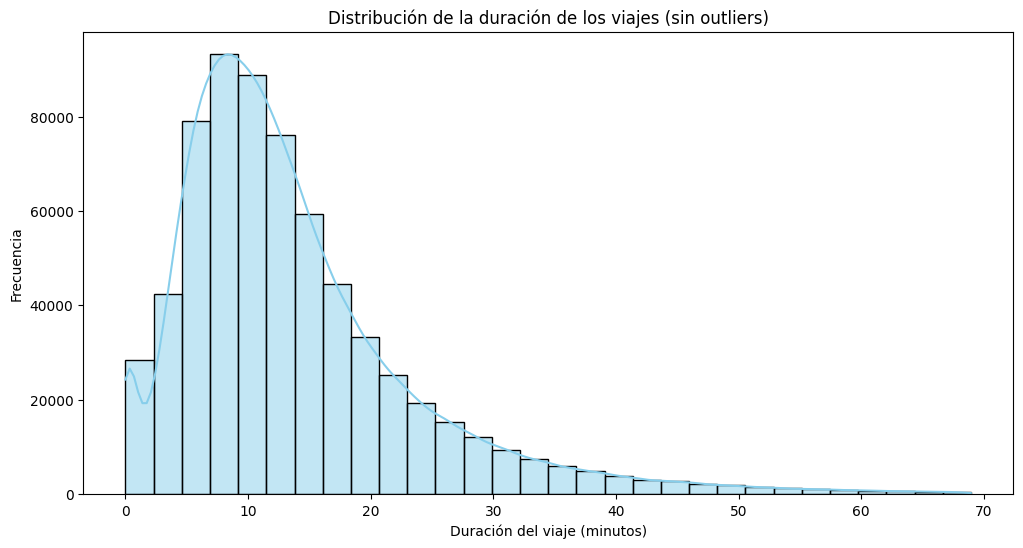

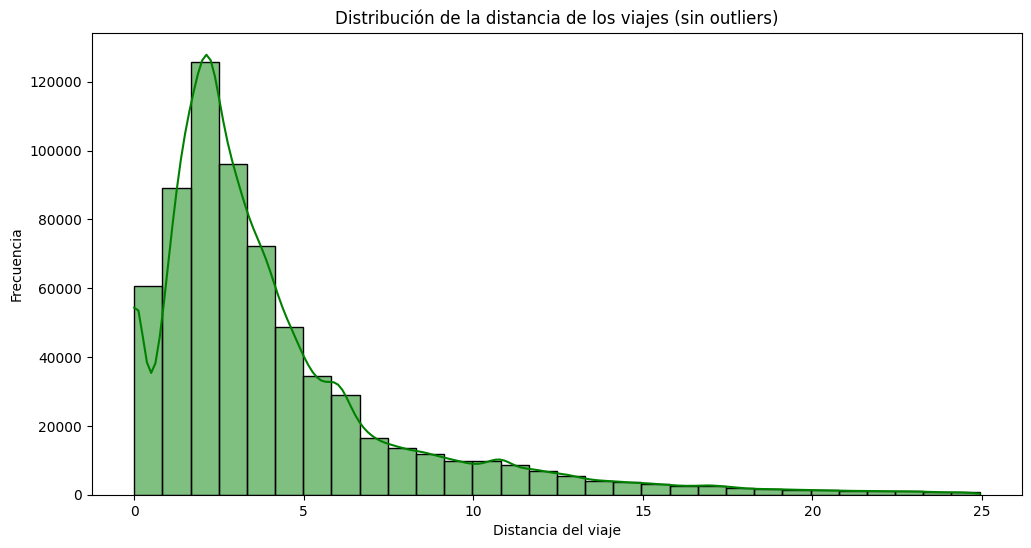

In [7]:
# Eliminar outliers para la distancia de los viajes (incluyendo valores negativos)
distancia_sin_outliers = df_taxisVerdes[(df_taxisVerdes['distancia de viaje'] >= 0) & (df_taxisVerdes['distancia de viaje'] < df_taxisVerdes['distancia de viaje'].quantile(0.99))]

# Eliminar outliers para la duración de los viajes (incluyendo valores negativos)
duracion_sin_outliers = df_taxisVerdes[(df_taxisVerdes['duracion de viaje (min)'] >= 0) & (df_taxisVerdes['duracion de viaje (min)'] < df_taxisVerdes['duracion de viaje (min)'].quantile(0.99))]

# Analizar la duración promedio de los viajes
duracion_promedio = duracion_sin_outliers['duracion de viaje (min)'].mean()
print("Duración promedio de los viajes (minutos):", duracion_promedio)

# Analizar la distancia promedio de los viajes
distancia_promedio = distancia_sin_outliers['distancia de viaje'].mean()
print("Distancia promedio de los viajes:", distancia_promedio)

# Visualizar la distribución de la duración de los viajes sin outliers
plt.figure(figsize=(12, 6))
sns.histplot(duracion_sin_outliers['duracion de viaje (min)'], kde=True, color='skyblue', bins=30)
plt.xlabel('Duración del viaje (minutos)')
plt.ylabel('Frecuencia')
plt.title('Distribución de la duración de los viajes (sin outliers)')
plt.show()


# Visualizar la distribución de la distancia de los viajes sin outliers
plt.figure(figsize=(12, 6))
sns.histplot(distancia_sin_outliers['distancia de viaje'], kde=True, color='green', bins=30)
plt.xlabel('Distancia del viaje')
plt.ylabel('Frecuencia')
plt.title('Distribución de la distancia de los viajes (sin outliers)')
plt.show()

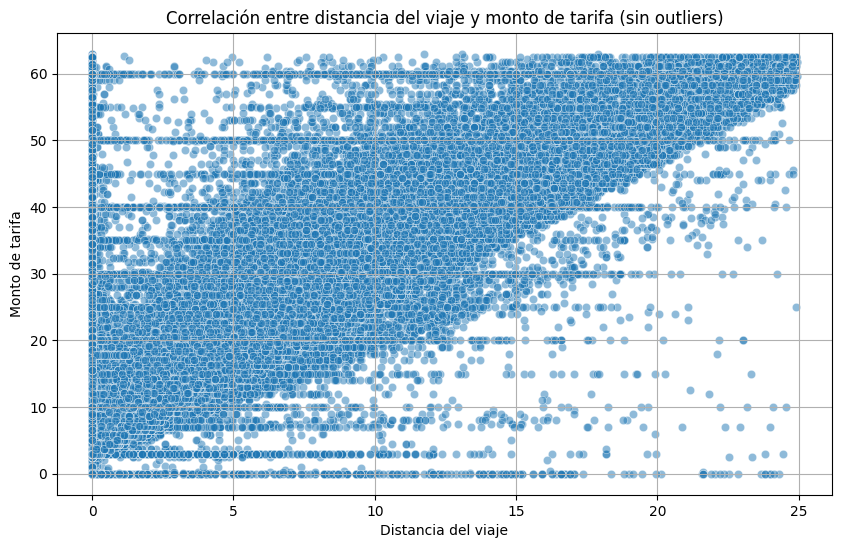

In [37]:
# Filtrar outliers y valores negativos
df_filtered = df_taxisVerdes[(df_taxisVerdes['distancia de viaje'] >= 0) & (df_taxisVerdes['distancia de viaje'] < df_taxisVerdes['distancia de viaje'].quantile(0.99))]
df_filtered = df_filtered[(df_filtered['monto de tarifa'] >= 0) & (df_filtered['monto de tarifa'] < df_filtered['monto de tarifa'].quantile(0.99))]

# Crear el diagrama de dispersión sin outliers ni valores negativos
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='distancia de viaje', y='monto de tarifa', alpha=0.5)
plt.xlabel('Distancia del viaje')
plt.ylabel('Monto de tarifa')
plt.title('Correlación entre distancia del viaje y monto de tarifa (sin outliers)')
plt.grid(True)
plt.show()


In [13]:
correlation = df_filtered['distancia de viaje'].corr(df_filtered['monto de tarifa'])
print("Coeficiente de correlación:", correlation)

Coeficiente de correlación: 0.8206654199288215


Si bien hay una correlación positiva entre la distancia del viaje y el monto de la tarifa, esta relación puede ser menos predecible debido a una serie de factores adicionales que podrían influir en la tarifa cobrada. Aquí hay algunas razones por las cuales esta relación podría ser menos predecible:
Políticas de tarifas variables, recargos y tasas adicionales, factores ambientales y de tráfico, ofertas promocionales y descuentos entre otros.

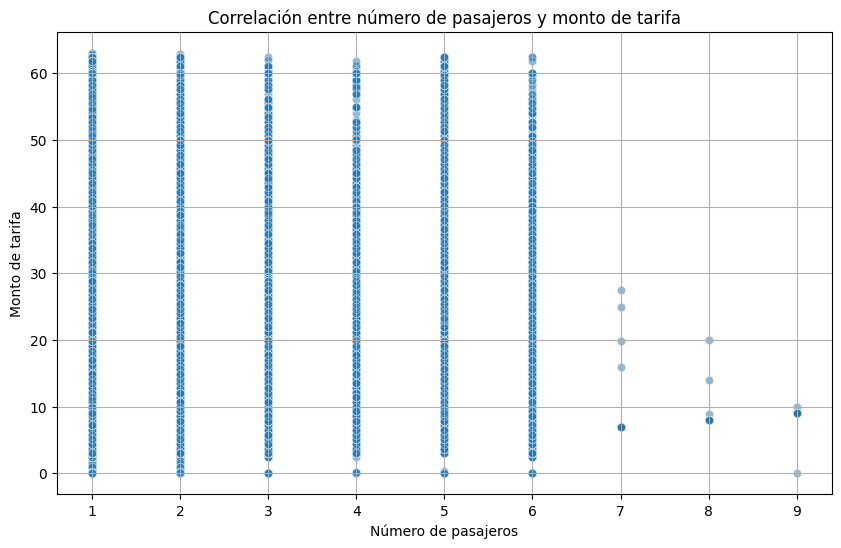

In [16]:
# Filtrar outliers y valores negativos
df_filtered = df_taxisVerdes[(df_taxisVerdes['distancia de viaje'] >= 0) & (df_taxisVerdes['distancia de viaje'] < df_taxisVerdes['distancia de viaje'].quantile(0.99))]
df_filtered = df_filtered[(df_filtered['monto de tarifa'] >= 0) & (df_filtered['monto de tarifa'] < df_filtered['monto de tarifa'].quantile(0.99))]

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_filtered, x='numero de pasajeros', y='monto de tarifa', alpha=0.5)
plt.xlabel('Número de pasajeros')
plt.ylabel('Monto de tarifa')
plt.title('Correlación entre número de pasajeros y monto de tarifa')
plt.grid(True)
plt.show()

El número de pasajeros no tiene un impacto significativo en el monto de la tarifa cobrada.

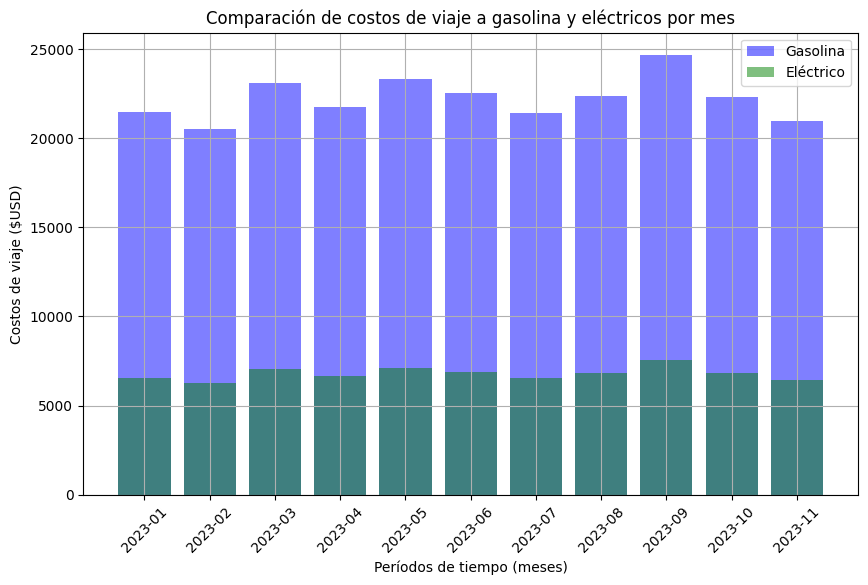

In [38]:
# Agrupar por mes y calcular el costo promedio de viaje para cada mes para ambos tipos de vehículos
costos_gasolina_por_mes = df_taxisVerdes.groupby(df_taxisVerdes['hora comienzo de viaje'].dt.to_period('M'))['costo de viaje gasolina ($usd)'].sum()
costos_electrico_por_mes = df_taxisVerdes.groupby(df_taxisVerdes['hora comienzo de viaje'].dt.to_period('M'))['costo de viaje kwh ($usd)'].sum()

# Obtener los períodos de tiempo (meses)
periodos = [str(periodo) for periodo in costos_gasolina_por_mes.index]

# Crear el gráfico de barras comparativo
plt.figure(figsize=(10, 6))
plt.bar(periodos, costos_gasolina_por_mes, label='Gasolina', color='blue', alpha=0.5)
plt.bar(periodos, costos_electrico_por_mes, label='Eléctrico', color='green', alpha=0.5)
plt.xlabel('Períodos de tiempo (meses)')
plt.ylabel('Costos de viaje ($USD)')
plt.title('Comparación de costos de viaje a gasolina y eléctricos por mes')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [48]:
# Total costo de viajes a gasolina
total_costo_gasolina = df_taxisVerdes['costo de viaje gasolina ($usd)'].sum()

# Total costo de viajes a batería
total_costo_bateria = df_taxisVerdes['costo de viaje kwh ($usd)'].sum()

# Calcular el porcentaje de ahorro
porcentaje_ahorro = ((total_costo_gasolina - total_costo_bateria) / total_costo_gasolina) * 100

print("Total del costo de viajes a gasolina anualizado es: $", round(total_costo_gasolina, 2))
print("Total del costo de viajes a batería anualizado es: $", round(total_costo_bateria, 2))
print("El porcentaje de ahorro al cambiar a autos eléctricos sería del:", round(porcentaje_ahorro, 2), "%")

Total del costo de viajes a gasolina anualizado es: $ 244452.35
Total del costo de viajes a batería anualizado es: $ 74680.4
El porcentaje de ahorro al cambiar a autos eléctricos sería del: 69.45 %


Eficiencia de combustible: Los vehículos eléctricos tienden a ser más eficientes en el uso de la energía en comparación con los vehículos de gasolina. Esto significa que pueden recorrer más distancia por unidad de energía consumida, lo que resulta en costos de combustible más bajos en términos de dólares por milla o kilómetro.

------------------------------------------------------------------------------------------------------------------------------------------------------------

# EDA de contaminacion sonora

In [ ]:
# Crear el DataFrame contaminacion_sonora_nyk
contaminacion_sonora_nyk = pd.DataFrame({
    'sonidos_ajenos_autos': [15936],
    'sonido_motor': [4090],
    'sonidos_gral_auto': [1958],
    'total_sonido_auto': [6048]
})

# Mostrar el DataFrame creado
contaminacion_sonora_nyk


Los sonidos que provienen de autos se dividen en la 2da (motor) y 3ra columna (sonidos diversos ajenos a motor) y en la 4ta columna es la suma de estas dos

In [ ]:
# Extraer los valores de las columnas
valores = contaminacion_sonora_nyk[['sonido_motor', 'sonidos_gral_auto']].iloc[0].tolist()

# Etiquetas para las porciones del gráfico
etiquetas = ['Motor', 'Otros Sonidos']

# Colores para las porciones del gráfico
colores = ['#1c5739', '#66bb6a']

# Crear el gráfico de torta con colores personalizados
plt.figure(figsize=(8, 6))
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=180, colors=colores)
plt.title('Distribución de la Contaminación Sonora de Vehículos')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Guardar la imagen
plt.savefig('contaminacion_sonora_autos.png')

# Mostrar el gráfico
plt.show()


![alt text](image.png)

In [ ]:

colores = ['#1c5739', '#66bb6a']

# Extraer los valores de las columnas 'sonidos_ajenos_autos' y 'total_sonido_auto'
valores = contaminacion_sonora_nyk[['sonidos_ajenos_autos', 'total_sonido_auto']].iloc[0]

# Calcular los porcentajes
porcentajes = valores / valores.sum() * 100

# Crear el gráfico de torta
plt.figure(figsize=(8, 8))
plt.pie(porcentajes, labels=['Sonidos Ajenos a Autos', 'Total de Sonidos de Autos'], colors=colores, autopct='%1.1f%%', startangle=180)
plt.title('Distribución de la Contaminación Sonora en New York')
plt.axis('equal')  # Aspecto circular

# Agregar etiquetas personalizadas
plt.legend(loc='upper right')

# Guardar la imagen
plt.savefig('contaminacion_autos_ajenos.png')

# Mostrar el gráfico
plt.show()


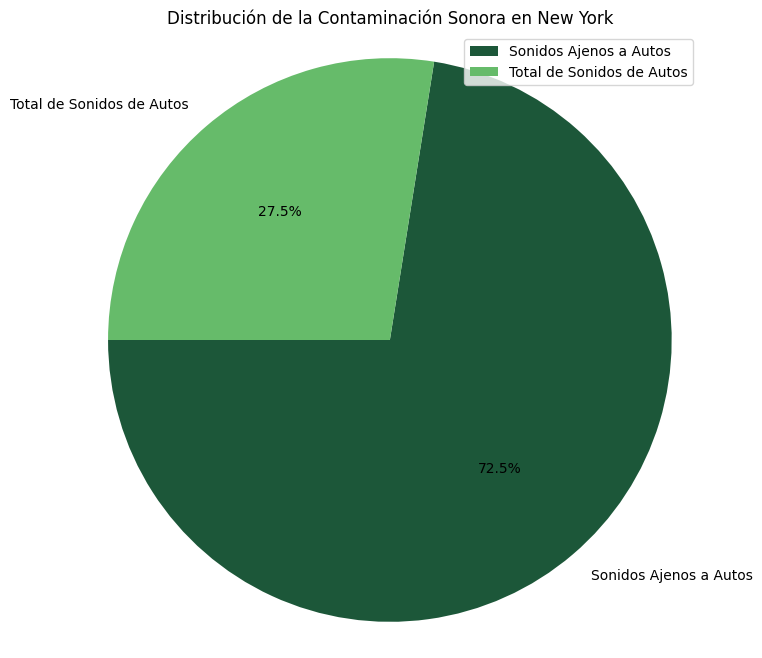

In [ ]:

# Calcula los porcentajes de cada columna
porcentajes = contaminacion_sonora_nyk[['sonidos_ajenos_autos', 'sonido_motor', 'sonidos_gral_auto']].sum() / contaminacion_sonora_nyk[['sonidos_ajenos_autos', 'sonido_motor', 'sonidos_gral_auto']].sum().sum() * 100

# Define los colores
colores = ['#1c5739', '#66bb6a', '#1565c0']

# Define las etiquetas personalizadas
etiquetas = ['Sonidos Ajenos', 'Motor', 'Otros Sonidos de Auto']

# Crea el gráfico de torta
plt.figure(figsize=(8, 8))
_, _, autopcts = plt.pie(porcentajes, labels=None, autopct='%1.1f%%', colors=colores)
plt.title('Porcentaje de Contaminación Sonora')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Agrega las etiquetas personalizadas
plt.legend(etiquetas, loc="best")

# Agrega etiquetas de porcentaje personalizadas
for i, autopct in enumerate(autopcts):
    autopct.set_text(etiquetas[i] + ": " + autopct.get_text())

# Guarda la imagen
plt.savefig('distribucion_contaminacion_sonora.png')

# Muestra el gráfico
plt.show()


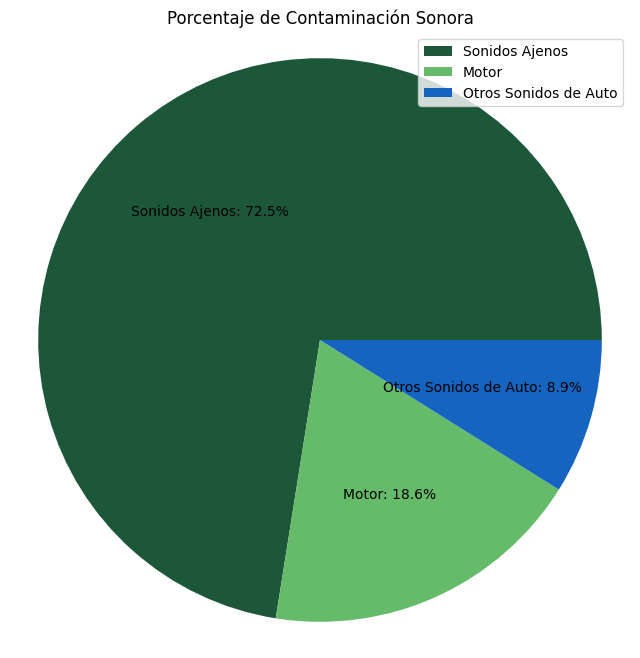

------------------------------------------------------------------------------------------------------------------------------------------------------------

# EDA de contaminacion de CO2

Distribucion de la produccion ede co2 en NY emitido por distos medios de trasporte para el año 2022, segun los datos producidod por la ciudad de New York

In [ ]:
plt.figure(figsize=(10, 6))

# Grafico de barras
bars = plt.bar(datos_reduc['Source'], datos_reduc['FY 2022 tCO2e'], color='skyblue')

# Agregar porcentajes encima de cada barra
total = sum(datos_reduc['FY 2022 tCO2e'])
for bar in bars:
    height = bar.get_height()
    percent = (height / total) * 100
    plt.text(bar.get_x() + bar.get_width()/2, height, f'{percent:.1f}%', ha='center', va='bottom')

# Configuración del gráfico
plt.xlabel('Fuente')
plt.ylabel('FY 2022 tCO2e')
plt.title('FY 2022 tCO2e por Fuente')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para que sean legibles
plt.tight_layout()  # Ajustar el diseño para evitar solapamiento
plt.show()

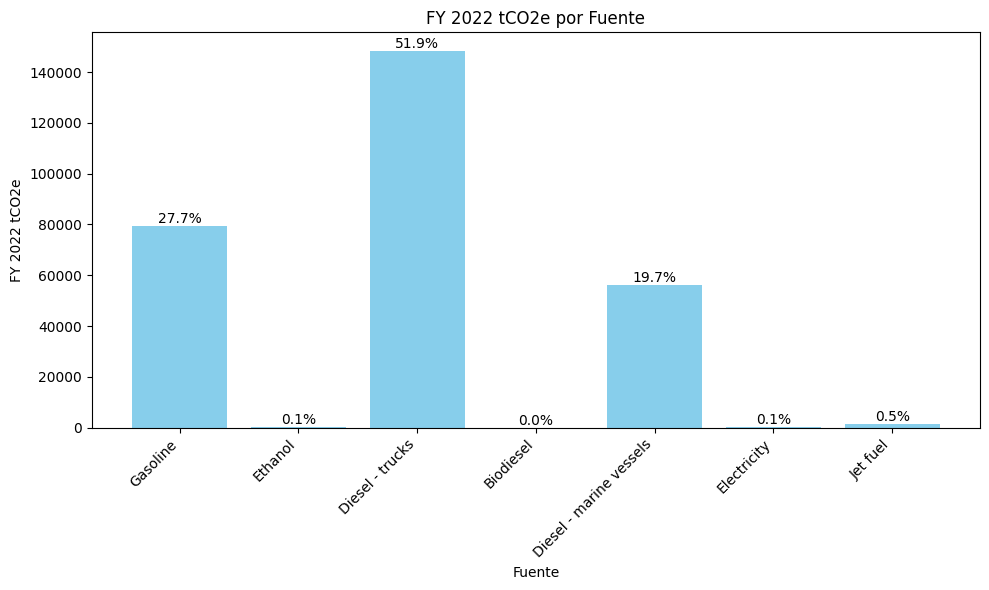

Comparacion entre al produccion de co2 de los vehiculos e gasolina, y el co2 generado durante la produccion de electricidad utilizada en el trasnporte electrioco de la ciudad (ej trenes), durante el 2022

In [ ]:
total_emisiones_2022 = datos_reduc['FY 2022 tCO2e'].sum()

# Filtrar las filas correspondientes a gasolina y electricidad
gasolina_electricidad_df = datos_reduc[datos_reduc['Source'].isin(['Gasoline', 'Electricity'])]

# Calcular el porcentaje de emisiones de gasolina y electricidad con respecto al total
gasolina_electricidad_df['Porcentaje del total'] = (gasolina_electricidad_df['FY 2022 tCO2e'] / total_emisiones_2022) * 100

# Graficar el porcentaje de emisiones de gasolina y electricidad
plt.figure(figsize=(8, 6))
plt.pie(gasolina_electricidad_df['Porcentaje del total'], labels=gasolina_electricidad_df['Source'], autopct='%1.1f%%', colors=['skyblue', 'lightgreen'])
plt.title('Porcentaje de Emisiones de CO2 por Gasolina y Electricidad en  2022')
plt.show()

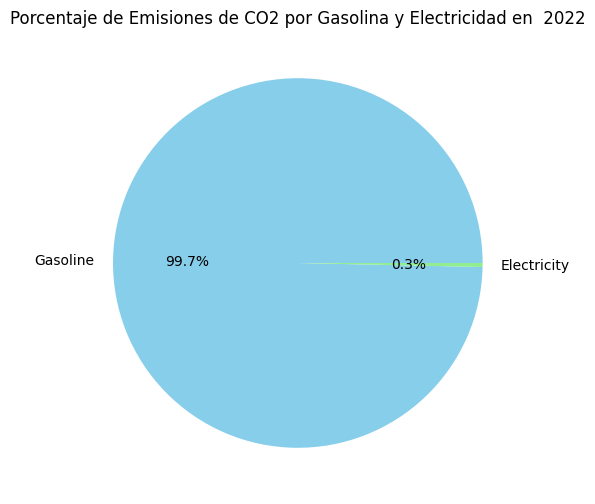